In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# For consistency
random_seed = 72
np.random.seed(random_seed)


In [3]:

# Create some data
n_entries = 9001
entry_ids = np.arange(n_entries)
data_df = pd.DataFrame(data=entry_ids, columns=['entry_ids'])
data_df.head()

,entry_ids
0,0
1,1
2,2
3,3
4,4


In [4]:

# Creating random variables
random_col1 = np.random.normal(0, 5, entry_ids.size)
random_col2 = np.random.normal(4, 2, entry_ids.size)
data_df['col1'] = pd.Series(random_col1, index=data_df.index)
data_df['col2'] = pd.Series(random_col2, index=data_df.index)



data_df.head()


,entry_ids,col1,col2
0,0,1.592727,0.500382
1,1,-3.397797,4.927748
2,2,-11.041942,3.330705
3,3,2.951201,5.835964
4,4,8.373830,4.580326


In [5]:

# Getting a random sample from the population
sample_size = 200
sample_df = data_df.sample(sample_size, random_state=random_seed)
sample_df.describe()


,entry_ids,col1,col2
count,200.000000,200.000000,200.000000
mean,4188.605000,0.058750,4.146946
std,2368.773293,5.190724,2.051522
min,142.000000,-12.737091,-1.783443
25%,2374.000000,-3.186165,2.868998
50%,3852.500000,0.325406,4.228844
75%,6036.500000,3.278900,5.483611
max,8929.000000,13.291145,8.380286


In [6]:

# Assign groups (randomly)
group_assignment = np.random.choice([0, 1], size=sample_size)
sample_df = sample_df.assign(group=group_assignment)
sample_df.describe()

,entry_ids,col1,col2,group
count,200.000000,200.000000,200.000000,200.000000
mean,4188.605000,0.058750,4.146946,0.485000
std,2368.773293,5.190724,2.051522,0.501029
min,142.000000,-12.737091,-1.783443,0.000000
25%,2374.000000,-3.186165,2.868998,0.000000
50%,3852.500000,0.325406,4.228844,0.000000
75%,6036.500000,3.278900,5.483611,1.000000
max,8929.000000,13.291145,8.380286,1.000000


<Axes: xlabel='col1', ylabel='Density'>

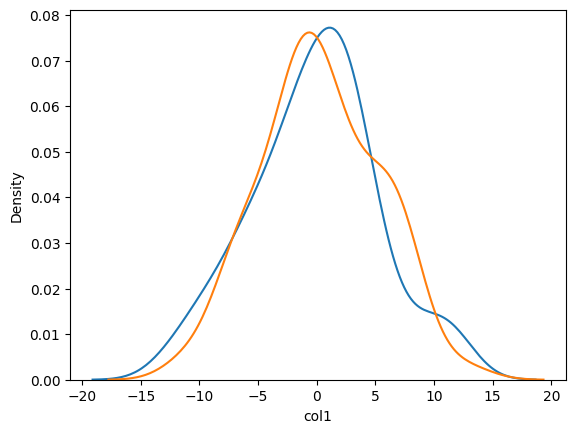

In [7]:

# Check for that groups in sample are similar in regards to random variable
# Plot visually
sns.kdeplot(sample_df[sample_df.group == 0].col1)
sns.kdeplot(sample_df[sample_df.group == 1].col1)

<Axes: xlabel='col2', ylabel='Density'>

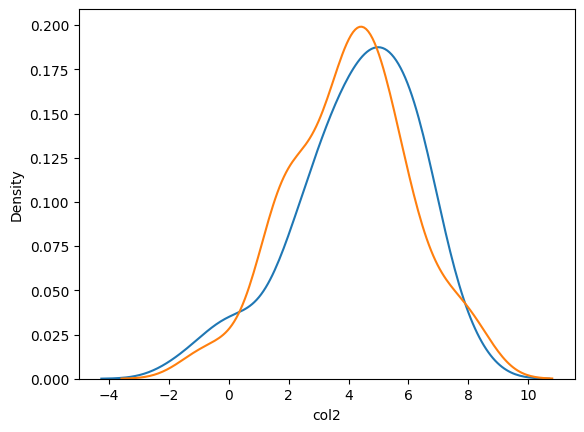

In [8]:

sns.kdeplot(sample_df[sample_df.group == 0].col2)
sns.kdeplot(sample_df[sample_df.group == 1].col2)

<Axes: xlabel='col1', ylabel='Density'>

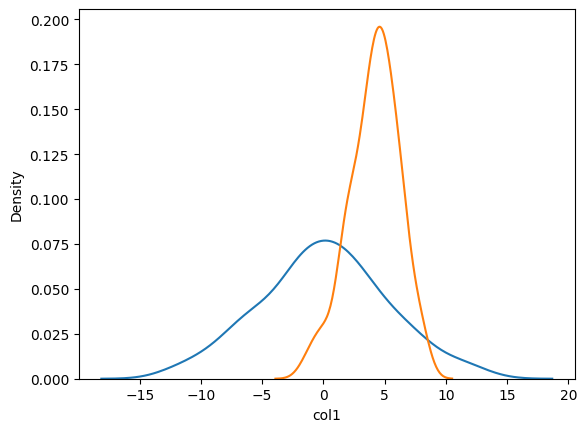

In [9]:

sns.kdeplot(sample_df.col1)
sns.kdeplot(sample_df.col2)

In [10]:

# Can also do a hypothesis test
from scipy import stats


In [11]:

def check_significance(data1, data2, alpha=0.05):    
    # Is it significant? Welch's test
    t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)
    return p_val < alpha, p_val


In [12]:


def compare_groups(df, col_name, alpha=0.05):
    #
    experiment_group = df[df.group == 0][col_name]
    control_group = df[df.group == 1][col_name]
    # 
    return check_significance(experiment_group, control_group, alpha)


In [13]:

compare_groups(sample_df, 'col2')

(False, 0.42978681439524635)

In [14]:

check_significance(sample_df.col1, sample_df.col2)

(True, 2.84912539013435e-21)